In [ ]:
#Черных Артемий
#Задание 1
#1. Постановка задачи
#Бизнес-постановка: Разработать модель машинного обучения, которая предсказывает цену автомобиля на основе его характеристик, таких как тип трансмиссии, пробег, тип топлива, дорожный налог, расход топлива и объем двигателя. Эта модель может быть использована автодилерами (авто.ру или дром) и частными продавцами для определения оптимальной цены продажи, а покупателями - для оценки справедливости предлагаемой цены.
#ML-постановка: Задача регрессии, где нужно предсказать непрерывное значение - цену автомобиля.
#Набор данных: Отобранный набор данных, содержащий информацию о цене, типе трансмиссии, пробеге, типе топлива, дорожном налоге, расходе топлива и объеме двигателя, подходит для решения данной задачи. (ссылка на датасет: https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes/data)
#2. Выбор метрики
#Метрика: Средняя абсолютная ошибка (MAE).
#Обоснование: MAE измеряет среднюю величину ошибки между предсказанными и фактическими значениями цен. Она проста для интерпретации (сразу даст понять насколько денег мы ошиблись) и менее чувствительна к выбросам, чем другие метрики, такие как среднеквадратичная ошибка (MSE).#


In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
ave_file = r'C:\Users\ААА\Desktop\bmw.csv'
df = pd.read_csv(ave_file)

In [8]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [17]:
df.info() #здесь видно, что данные чистые и структурированные

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [10]:
model = df.loc[: , "model"].values
year = df.loc[: , "year"].values
price = df.loc[: , "price"].values
transmission = df.loc[: , "transmission"].values
mileage = df.loc[: , "mileage"].values
fuelType = df.loc[: , "fuelType"].values
tax = df.loc[: , "tax"].values
mpg = df.loc[: , "mpg"].values
engineSize = df.loc[: , "engineSize"].values

In [11]:
transmission

array(['Automatic', 'Automatic', 'Automatic', ..., 'Manual', 'Automatic',
       'Automatic'], dtype=object)

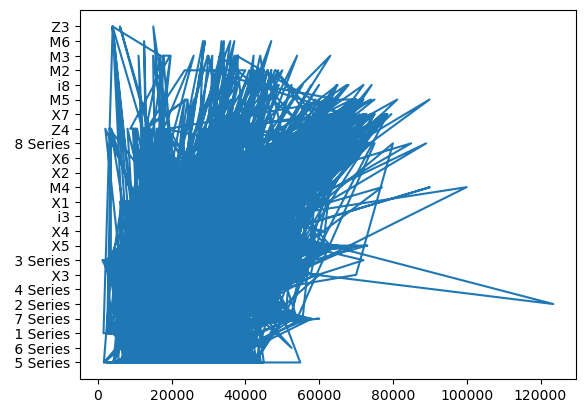

In [12]:
plt.plot(price, model)

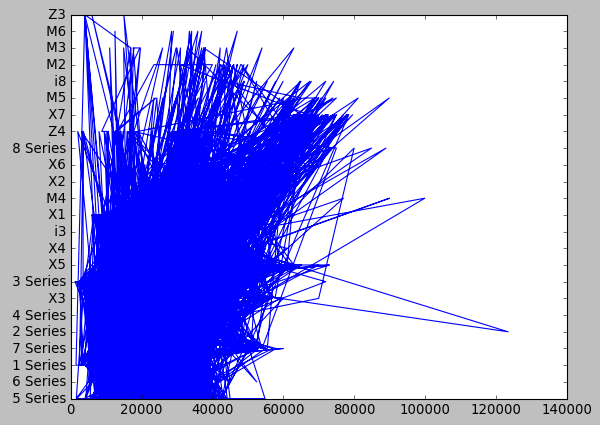

In [14]:
plt. style.use('classic')
plt.plot(price, model)

Text(0.5, 0.98, '')

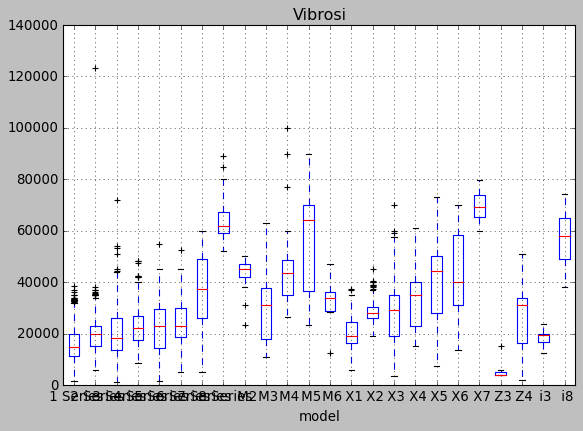

In [23]:
df.boxplot(column = 'price', by = 'model') #здесь могут быть заметны выбросы, но надо понимать, что цена строится не только из модельного ряда
plt.title("Vibrosi")
plt.suptitle("")

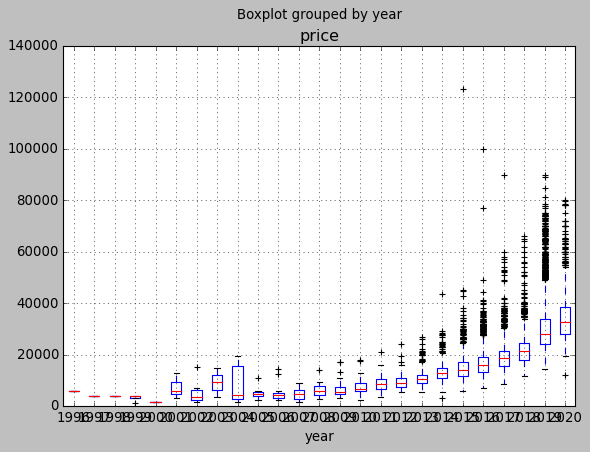

In [29]:
df.boxplot(column='price', by='year')
plt.show()

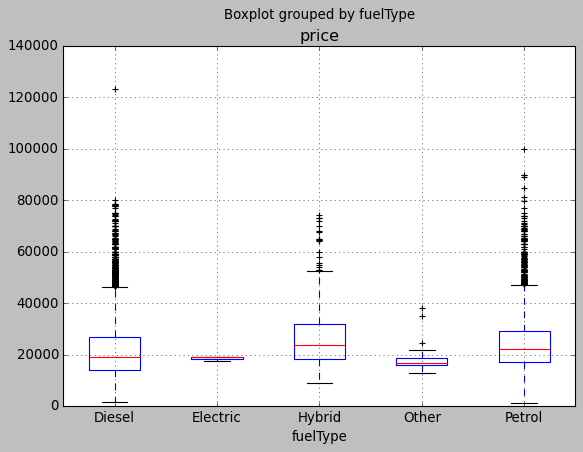

In [30]:
df.boxplot(column='price', by='fuelType')
plt.show()

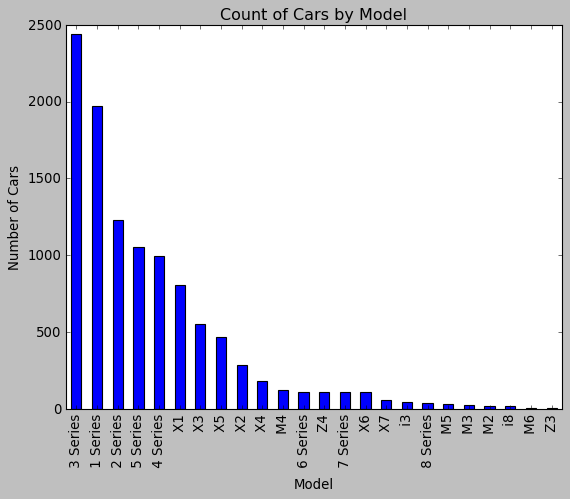

In [32]:
df['model'].value_counts().plot(kind='bar')
plt.xlabel('Model')
plt.ylabel('Number of Cars')
plt.title('Count of Cars by Model')
plt.show()

In [ ]:
#Здесь можно увидеть, что на некоторые модели машин будет сложно предсказать цену, так как данных мало